<a href="https://colab.research.google.com/github/ArunK-ML/Learn---TimeSeries-StockPrice---Tensorflow/blob/main/TimeSeries_Stockprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
df = yf.download("HCLTECH.NS",start="2017-04-23",end=None)

/tmp/ipython-input-3007808460.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("HCLTECH.NS",start="2017-04-23",end=None)
[*********************100%***********************]  1 of 1 completed


In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,HCLTECH.NS,HCLTECH.NS,HCLTECH.NS,HCLTECH.NS,HCLTECH.NS
Date,,,,,
2017-04-24,329.837708,331.628668,325.692354,327.201586,1373968
2017-04-25,329.998749,332.373260,327.443100,331.628715,2194602
2017-04-26,322.070221,330.823770,320.581107,330.783533,1918248
2017-04-27,325.873383,330.018735,320.440147,320.762112,5640334
2017-04-28,327.644287,330.018823,321.868968,327.161352,2794138
...,...,...,...,...,...
2025-09-18,1493.800049,1502.900024,1486.099976,1492.599976,2792406
2025-09-19,1467.400024,1493.800049,1464.000000,1493.800049,3197957


In [4]:
df.columns

MultiIndex([( 'Close', 'HCLTECH.NS'),
            (  'High', 'HCLTECH.NS'),
            (   'Low', 'HCLTECH.NS'),
            (  'Open', 'HCLTECH.NS'),
            ('Volume', 'HCLTECH.NS')],
           names=['Price', 'Ticker'])

In [5]:
for i in df.columns:
  print(i[0])

[i[0] for i in df.columns]

Close
High
Low
Open
Volume


['Close', 'High', 'Low', 'Open', 'Volume']

In [6]:
df1 = df.copy()
df1.columns = [i[0] for i in df1.columns]

In [7]:
df1

,Close,High,Low,Open,Volume
Date,,,,,
2017-04-24,329.837708,331.628668,325.692354,327.201586,1373968
2017-04-25,329.998749,332.373260,327.443100,331.628715,2194602
2017-04-26,322.070221,330.823770,320.581107,330.783533,1918248
2017-04-27,325.873383,330.018735,320.440147,320.762112,5640334
2017-04-28,327.644287,330.018823,321.868968,327.161352,2794138
...,...,...,...,...,...
2025-09-18,1493.800049,1502.900024,1486.099976,1492.599976,2792406
2025-09-19,1467.400024,1493.800049,1464.000000,1493.800049,3197957
2025-09-22,1439.900024,1449.199951,1415.000000,1423.000000,4457129


In [8]:
df1 = df.copy()

In [9]:
df1.columns = df1.columns.droplevel(1)
df1.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [10]:
df1 = df.copy()
df1.columns = ["_".join(i).strip() for i in df1.columns.values]
df1

,Close_HCLTECH.NS,High_HCLTECH.NS,Low_HCLTECH.NS,Open_HCLTECH.NS,Volume_HCLTECH.NS
Date,,,,,
2017-04-24,329.837708,331.628668,325.692354,327.201586,1373968
2017-04-25,329.998749,332.373260,327.443100,331.628715,2194602
2017-04-26,322.070221,330.823770,320.581107,330.783533,1918248
2017-04-27,325.873383,330.018735,320.440147,320.762112,5640334
2017-04-28,327.644287,330.018823,321.868968,327.161352,2794138
...,...,...,...,...,...
2025-09-18,1493.800049,1502.900024,1486.099976,1492.599976,2792406
2025-09-19,1467.400024,1493.800049,1464.000000,1493.800049,3197957
2025-09-22,1439.900024,1449.199951,1415.000000,1423.000000,4457129


In [11]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [12]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [13]:
df.isna().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [14]:
lookback = 60
test_size = 0.2
n_total = len(df)
n_test = int(n_total*test_size)
df_train = df.iloc[:-n_test].copy()


In [15]:
df_train

,Close,High,Low,Open,Volume
Date,,,,,
2017-04-24,329.837708,331.628668,325.692354,327.201586,1373968
2017-04-25,329.998749,332.373260,327.443100,331.628715,2194602
2017-04-26,322.070221,330.823770,320.581107,330.783533,1918248
2017-04-27,325.873383,330.018735,320.440147,320.762112,5640334
2017-04-28,327.644287,330.018823,321.868968,327.161352,2794138
...,...,...,...,...,...
2024-01-12,1449.359131,1462.716366,1409.569437,1415.683686,5862043
2024-01-15,1493.946289,1523.482841,1482.000032,1514.452587,9712071
2024-01-16,1463.139526,1492.817192,1446.725168,1492.817192,4459799


In [16]:
df_train = df["Close"].iloc[:-n_test].copy()

In [17]:
df_train

,Close
Date,
2017-04-24,329.837708
2017-04-25,329.998749
2017-04-26,322.070221
2017-04-27,325.873383
2017-04-28,327.644287
...,...
2024-01-12,1449.359131
2024-01-15,1493.946289
2024-01-16,1463.139526


In [18]:
df_test = df["Close"].iloc[-n_test:].copy()
df_test

,Close
Date,
2024-01-19,1486.275635
2024-01-23,1444.283203
2024-01-24,1494.285645
2024-01-25,1469.497681
2024-01-29,1492.532104
...,...
2025-09-18,1493.800049
2025-09-19,1467.400024
2025-09-22,1439.900024


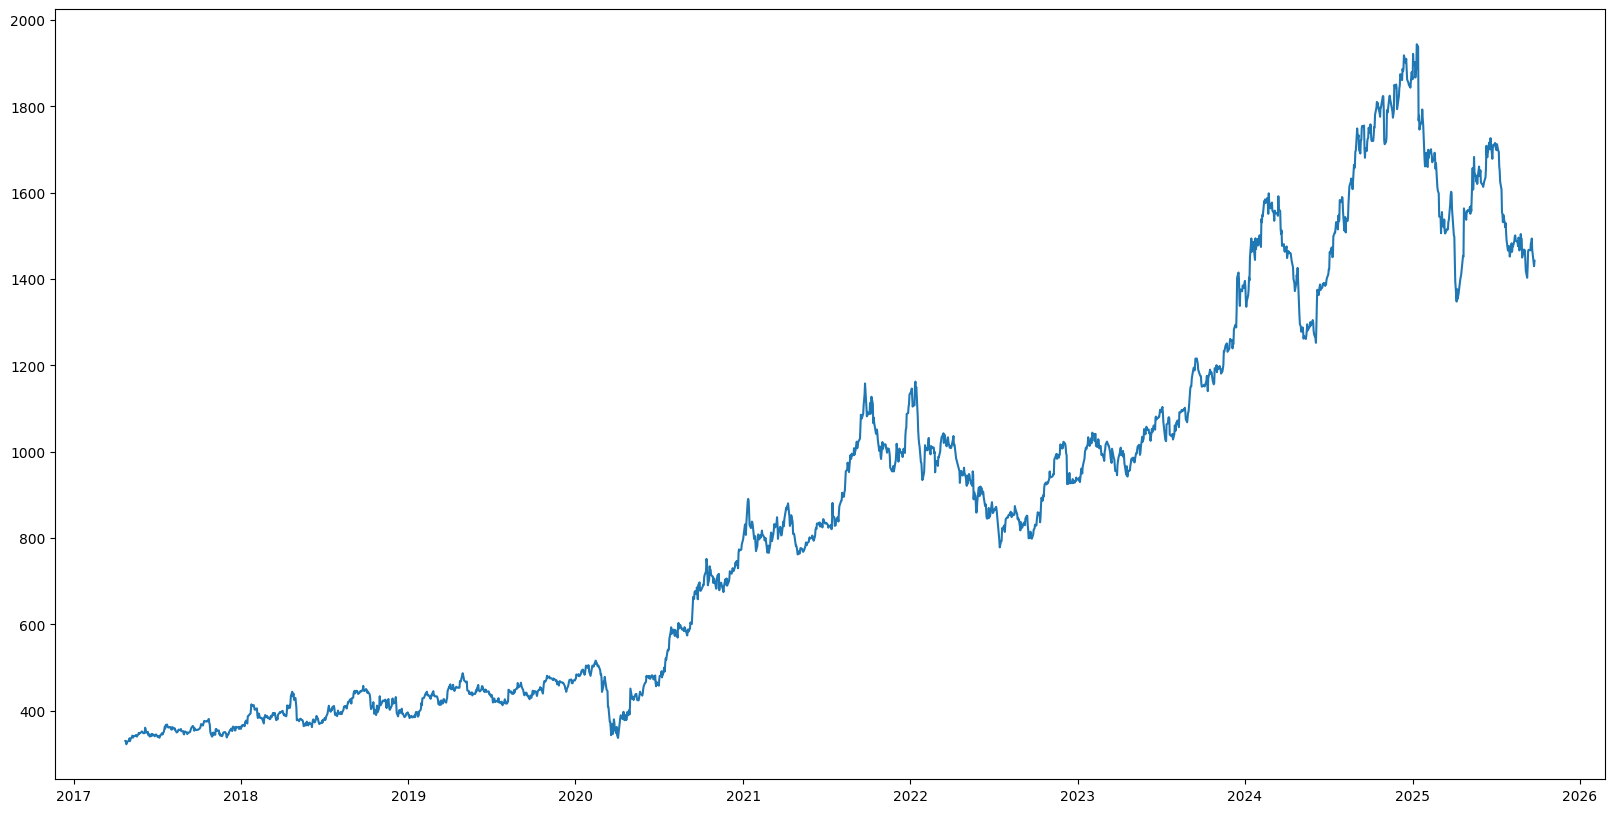

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df["Close"])
plt.show()

In [20]:
dataset = df["Close"].values
dataset

array([ 329.83770752,  329.99874878,  322.07022095, ..., 1439.90002441,
       1429.80004883, 1442.30004883])

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [22]:
import numpy as np
dataset = dataset.reshape(-1,1)
dataset

array([[ 329.83770752],
       [ 329.99874878],
       [ 322.07022095],
       ...,
       [1439.90002441],
       [1429.80004883],
       [1442.30004883]])

In [23]:
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0047893 ],
       [0.0048886 ],
       [0.        ],
       ...,
       [0.68923486],
       [0.68300739],
       [0.69071468]])

In [24]:
train_data = scaled_data[0:1700,:]

x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

x_train[0]

array([0.0047893 , 0.0048886 , 0.        , 0.00234496, 0.00343687,
       0.00540963, 0.00864804, 0.00440465, 0.0072832 , 0.00991361,
       0.01228343, 0.01075733, 0.00954134, 0.01176231, 0.01198574,
       0.01224625, 0.01322641, 0.01194848, 0.0110303 , 0.01419422,
       0.01604294, 0.01503089, 0.01621786, 0.0160929 , 0.01742984,
       0.01835441, 0.01737976, 0.01688007, 0.01579305, 0.015993  ,
       0.02367695, 0.02144047, 0.01840435, 0.01650524, 0.01770465,
       0.01310679, 0.01473104, 0.01241968, 0.01107023, 0.01194483,
       0.01488095, 0.01218222, 0.01360654, 0.01428127, 0.01137009,
       0.0134192 , 0.0132192 , 0.01404384, 0.01085787, 0.01170744,
       0.0106954 , 0.01148252, 0.00929601, 0.01373152, 0.01398137,
       0.01481854, 0.01596801, 0.01390646, 0.01834188, 0.02149042])

In [25]:
y_train[0]

np.float64(0.025163767160357675)

In [26]:
x_train[1]

array([0.0048886 , 0.        , 0.00234496, 0.00343687, 0.00540963,
       0.00864804, 0.00440465, 0.0072832 , 0.00991361, 0.01228343,
       0.01075733, 0.00954134, 0.01176231, 0.01198574, 0.01224625,
       0.01322641, 0.01194848, 0.0110303 , 0.01419422, 0.01604294,
       0.01503089, 0.01621786, 0.0160929 , 0.01742984, 0.01835441,
       0.01737976, 0.01688007, 0.01579305, 0.015993  , 0.02367695,
       0.02144047, 0.01840435, 0.01650524, 0.01770465, 0.01310679,
       0.01473104, 0.01241968, 0.01107023, 0.01194483, 0.01488095,
       0.01218222, 0.01360654, 0.01428127, 0.01137009, 0.0134192 ,
       0.0132192 , 0.01404384, 0.01085787, 0.01170744, 0.0106954 ,
       0.01148252, 0.00929601, 0.01373152, 0.01398137, 0.01481854,
       0.01596801, 0.01390646, 0.01834188, 0.02149042, 0.02516377])

In [27]:
type(x_train)

list

In [28]:
x_train = np.array(x_train)
type(x_train)

numpy.ndarray

In [29]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [ ]:
x_train.shape

In [30]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1640, 60, 1)

In [31]:
y_train.shape

(1640,)

In [32]:
x_train[0]

array([[0.0047893 ],
       [0.0048886 ],
       [0.        ],
       [0.00234496],
       [0.00343687],
       [0.00540963],
       [0.00864804],
       [0.00440465],
       [0.0072832 ],
       [0.00991361],
       [0.01228343],
       [0.01075733],
       [0.00954134],
       [0.01176231],
       [0.01198574],
       [0.01224625],
       [0.01322641],
       [0.01194848],
       [0.0110303 ],
       [0.01419422],
       [0.01604294],
       [0.01503089],
       [0.01621786],
       [0.0160929 ],
       [0.01742984],
       [0.01835441],
       [0.01737976],
       [0.01688007],
       [0.01579305],
       [0.015993  ],
       [0.02367695],
       [0.02144047],
       [0.01840435],
       [0.01650524],
       [0.01770465],
       [0.01310679],
       [0.01473104],
       [0.01241968],
       [0.01107023],
       [0.01194483],
       [0.01488095],
       [0.01218222],
       [0.01360654],
       [0.01428127],
       [0.01137009],
       [0.0134192 ],
       [0.0132192 ],
       [0.014

# **Model**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mean_squared_error")

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,301 (282.43 KB)

 Trainable params: 72,301 (282.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
result = model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - loss: 0.0017
Epoch 2/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 75s 45ms/step - loss: 5.7240e-04
Epoch 3/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - loss: 2.7856e-04
Epoch 4/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 132s 44ms/step - loss: 2.7490e-04
Epoch 5/10
1640/1640 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - loss: 2.3683e-04
Epoch 6/10
 295/1640 ━━━━━━━━━━━━━━━━━━━━ 59s 44ms/step - loss: 1.3253e-04

In [ ]:
test_data = scaled_data[1700:,:]

x_test = []
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test

In [ ]:
y_test = dataset[1700:,:]
type(x_test)

In [ ]:
x_test = np.array(x_test)
x_test.shape

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

pred = model.predict(x_test)
y_pred = scaler.inverse_transform(pred)

In [ ]:
y_pred

In [ ]:
k = df[["Close"]].iloc[-323:].copy()
#val = k[1700:]

k["prediction"]=y_pred.flatten()

k

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(df["Close"])
plt.plot(k[["Close","prediction"]])
plt.show()

In [ ]:
tomorrow = []
tomorrow.append(df[["Close"]].iloc[-60:].values)

tomorrow

In [ ]:
scaled_tomorrow = scaler.transform(tomorrow[0])

scaled_tomorrow

In [ ]:
scaled_tomorrow = scaled_tomorrow.reshape(1,60,1)
tomorrow_price = model.predict(scaled_tomorrow)

In [ ]:
tomorrow_actual_price = scaler.inverse_transform(tomorrow_price)
tomorrow_actual_price